In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


template = Image.open("template.jpg").convert("L")
template = np.array(template).astype(np.float32)

shelf = Image.open("shelf.jpg").convert("L")
shelf = np.array(shelf).astype(np.float32)

In [2]:
def convolution(image, kernel):
    img_h, img_w = image.shape
    k_h, k_w = kernel.shape

    kernel = np.flipud(np.fliplr(kernel))

    pad_h = k_h // 2
    pad_w = k_w // 2
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')

    output = np.zeros_like(image)

    for i in range(img_h):
        for j in range(img_w):
            region = padded[i:i+k_h, j:j+k_w]
            output[i, j] = np.sum(region * kernel)

    return output

In [3]:
def template_matching_convolution(image, template):

    template_zero_mean = template - np.mean(template)
    image_zero_mean = image - np.mean(image)
    flipped_template = np.flipud(np.fliplr(template_zero_mean))

    result = convolution(image_zero_mean, flipped_template)
    return result


In [4]:
def correlation(image, template):

    img_h, img_w = image.shape
    t_h, t_w = template.shape

    pad_h = t_h // 2
    pad_w = t_w // 2
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')

    output = np.zeros_like(image)

    template_zero_mean = template - np.mean(template)
    image_zero_mean = image - np.mean(image)

    for i in range(img_h):
        for j in range(img_w):
            region = padded[i:i+t_h, j:j+t_w]
            output[i, j] = np.sum(region * template_zero_mean)

    return output

conv_result = template_matching_convolution(shelf, template)
corr_result = correlation(shelf, template)

In [5]:
y_conv, x_conv = np.unravel_index(np.argmax(conv_result), conv_result.shape)
y_corr, x_corr = np.unravel_index(np.argmax(corr_result), corr_result.shape)

print("Convolution Match Location:", (x_conv, y_conv))
print("Correlation Match Location:", (x_corr, y_corr))

Convolution Match Location: (60, 36)
Correlation Match Location: (60, 36)


In [6]:
def draw_rectangle(image, x, y, template_shape):
    img_copy = np.copy(image)
    t_h, t_w = template_shape

    top = y - t_h // 2
    left = x - t_w // 2

    bottom = top + t_h
    right = left + t_w

    top = max(0, top)
    left = max(0, left)
    bottom = min(image.shape[0], bottom)
    right = min(image.shape[1], right)

    img_copy[top:bottom, left] = 255
    img_copy[top:bottom, right-1] = 255
    img_copy[top, left:right] = 255
    img_copy[bottom-1, left:right] = 255

    return img_copy


conv_marked = draw_rectangle(shelf, x_conv, y_conv, template.shape)
corr_marked = draw_rectangle(shelf, x_corr, y_corr, template.shape)



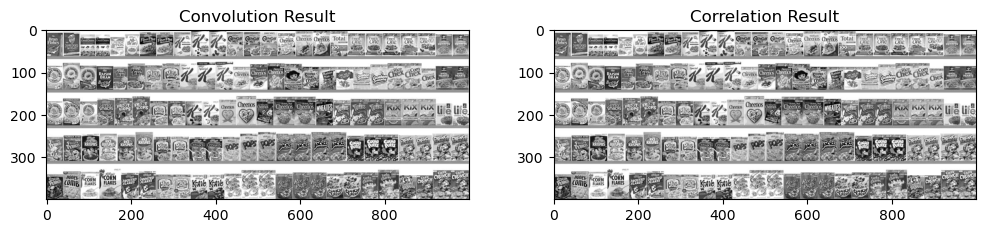

In [7]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Convolution Result")
plt.imshow(conv_marked, cmap='gray')

plt.subplot(1,2,2)
plt.title("Correlation Result")
plt.imshow(corr_marked, cmap='gray')

plt.show()


In [ ]:
print("\n--- Comparison ---")
print("1. Correlation is easier to understand because we match the template as it is.\n2. Both methods take almost the same amount of time to compute.\n3. Correlation is usually better because we do not flip the template.\n4. In most cases, correlation finds the product location more correctly.")



--- Comparison ---
1. Correlation is easier to understand because we match the template as it is.
2. Both methods take almost the same amount of time to compute.
3. Correlation is usually better because we do not flip the template.
4. In most cases, correlation finds the product location more correctly.
